In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Single features / Признаки по одному

## 1.1. Continuous / Количественные

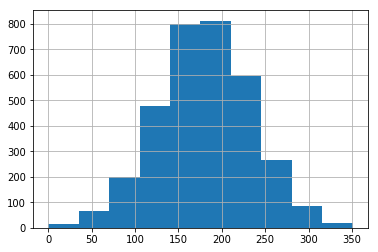

In [7]:
df['Total day minutes'].hist();

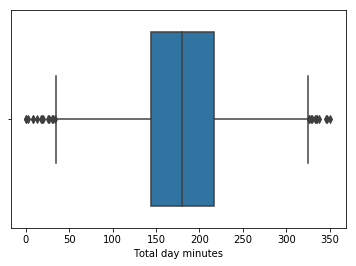

In [9]:
sns.boxplot(df['Total day minutes']);

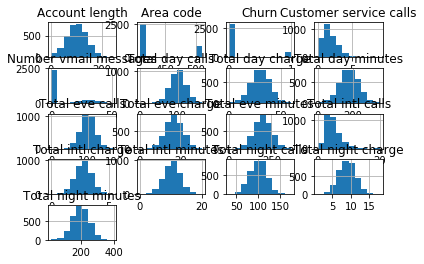

In [10]:
df.hist();

# 2. Categorical / Категориальные

In [12]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OH     78
Name: State, dtype: int64

In [14]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

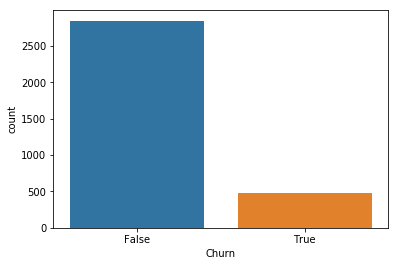

In [16]:
sns.countplot(df['Churn']);

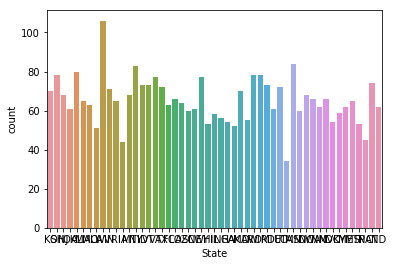

In [17]:
sns.countplot(df['State']);

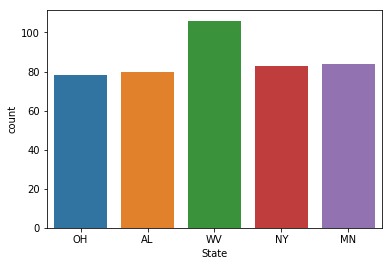

In [30]:
sns.countplot(df[df['State'].\
                 isin(df['State'].value_counts().head().index)]['State']);

# Feature interaction / Взаимодействия признаков
## 2.1. Cont-cont / Колич-колич

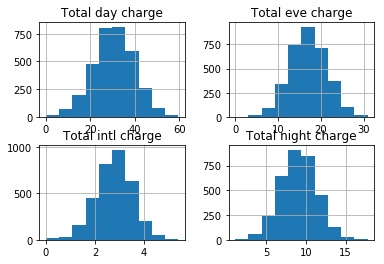

In [33]:
feat = [f for f in df.columns if 'charge' in f]
df[feat].hist();

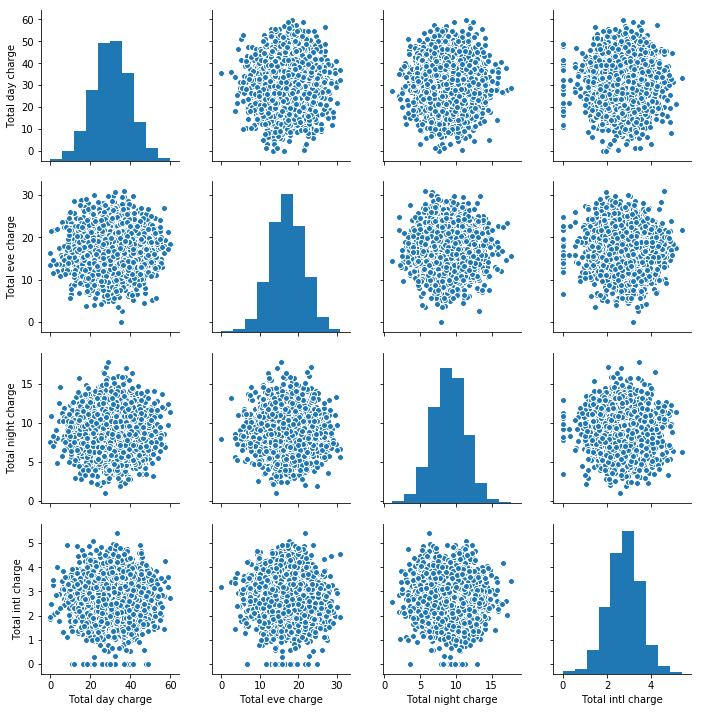

In [34]:
sns.pairplot(df[feat]);

In [45]:
df['Churn'].map({False: 'blue', True: 'orange'}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

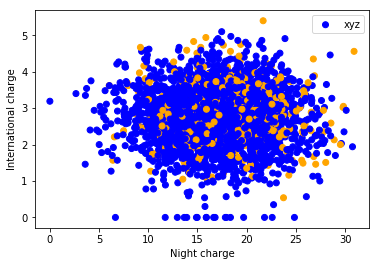

In [48]:
plt.scatter(df['Total eve charge'], df['Total intl charge'],
           color = df['Churn'].map({False: 'blue', True: 'orange'}),
           label = 'xyz');
plt.xlabel('Night charge');
plt.ylabel('International charge');
plt.legend();

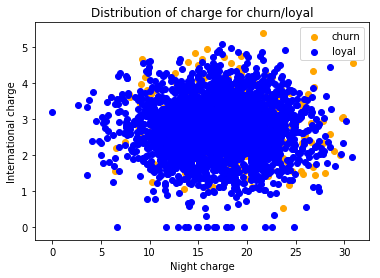

In [54]:
plt.scatter(df[df['Churn']]['Total eve charge'], 
            df[df['Churn']]['Total intl charge'],
            color = 'orange', label = 'churn');
plt.scatter(df[~df['Churn']]['Total eve charge'], 
            df[~df['Churn']]['Total intl charge'],
            color = 'blue', label = 'loyal');
plt.xlabel('Night charge');
plt.ylabel('International charge');
plt.title('Distribution of charge for churn/loyal')
plt.legend();

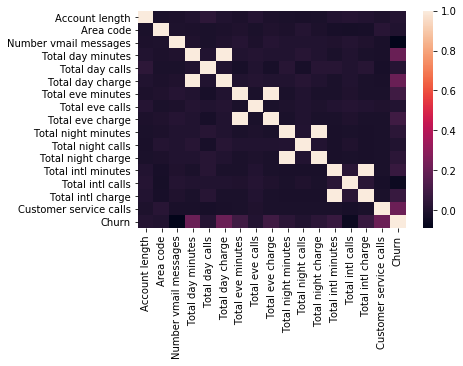

In [57]:
sns.heatmap(df.corr());

In [64]:
df.drop(feat, axis=1, inplace=True)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

In [65]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

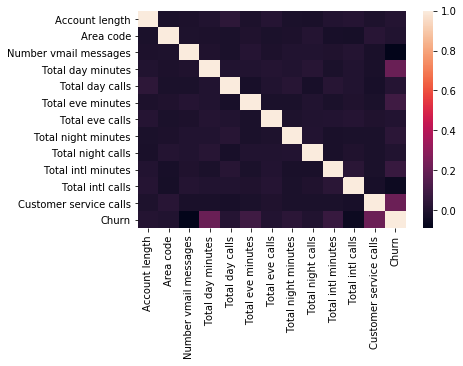

In [66]:
sns.heatmap(df.corr());

## 2.1. Cont-cat + cont-bin / Колич-катег + колич-бинар

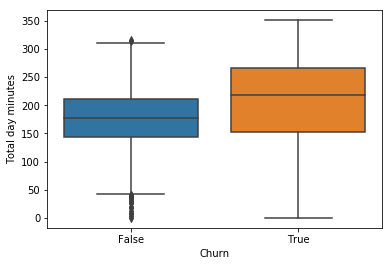

In [67]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);

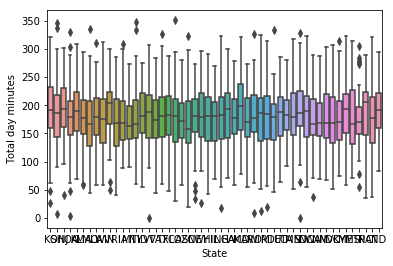

In [68]:
sns.boxplot(x='State', y='Total day minutes', data=df);

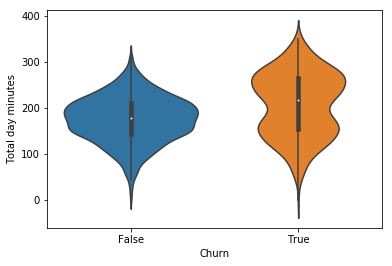

In [69]:
sns.violinplot(x='Churn', y='Total day minutes', data=df);

In [73]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

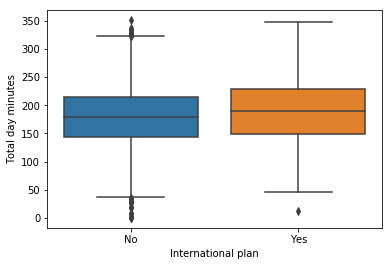

In [74]:
sns.boxplot(x='International plan', y='Total day minutes', data=df);

## 2.3 Categ-categ / Катег-катег

In [76]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


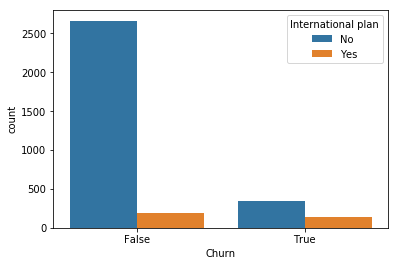

In [80]:
sns.countplot(x=df['Churn'], hue=df['International plan']);

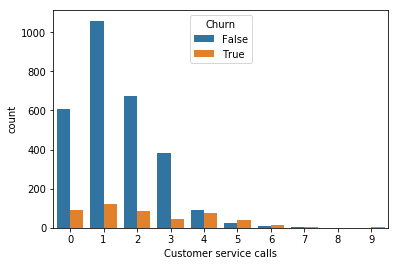

In [82]:
sns.countplot(x=df['Customer service calls'], hue=df['Churn']);

In [83]:
!pip install sklearn

    100% |████████████████████████████████| 12.4MB 104kB/s eta 0:00:01
  Running setup.py bdist_wheel for sklearn ... error
  Complete output from command /srv/venv/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-8zpycva9/sklearn/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmp5v8uahg8pip-wheel- --python-tag cp36:
  usage: -c [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
     or: -c --help [cmd1 cmd2 ...]
     or: -c --help-commands
     or: -c cmd --help
  
  error: invalid command 'bdist_wheel'
  
  ----------------------------------------
  Failed building wheel for sklearn
  Running setup.py clean for sklearn
Failed to build sklearn
  Running setup.py install for sklearn ... done


In [84]:
from sklearn.manifold import TSNE

In [87]:
tsne = TSNE(random_state=0)

In [97]:
df2 = df.drop('State', axis=1)

In [98]:
df2['International plan'] = df2['International plan'].map({'Yes':1, 'No':0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes':1, 'No':0})

In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Voice mail plan           3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Customer service calls    3333 non-null int64
Churn                     3333 non-null bool
dtypes: bool(1), float64(4), int64(10)
memory usage: 367.9 KB


In [100]:
%%time
tsne.fit(df2)

CPU times: user 1min 12s, sys: 12.1 s, total: 1min 25s
Wall time: 1min 25s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=0)

In [101]:
tsne.embedding_.shape

(3333, 2)

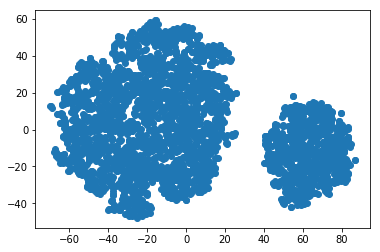

In [103]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1]);

In [104]:
df2['Churn'].values

array([False, False, False, ..., False, False, False])

In [105]:
tsne.embedding_[df2['Churn'].values].shape

(483, 2)

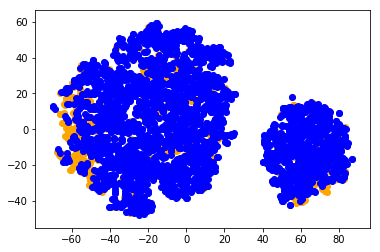

In [108]:
plt.scatter(tsne.embedding_[df2['Churn'].values, 0],
            tsne.embedding_[df2['Churn'].values, 1], color='orange');
plt.scatter(tsne.embedding_[~df2['Churn'].values, 0],
            tsne.embedding_[~df2['Churn'].values, 1], color='blue');